In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from collections import Counter
from matplotlib.colors import LinearSegmentedColormap
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, classification_report

In [3]:
data = pd.read_csv('/Users/haddock_ana/Ironhack/final_project/Data/wine_analysis/Data/wines_individual_grapes.csv', index_col=0)

In [4]:
data.drop(columns= ['Unnamed: 0'], inplace=True)

In [133]:
data.columns

Index(['WineID', 'WineName', 'Type', 'Elaborate', 'Grapes', 'ABV', 'Body',
       'Acidity', 'Code', 'Country', 'RegionID', 'RegionName', 'WineryID',
       'WineryName', 'Grape'],
      dtype='object')

In [134]:
len(data)

151793

In [5]:
clima = pd.read_csv('/Users/haddock_ana/Ironhack/final_project/Data/wine_analysis/Final Data/data_climate_pred_fv.csv', index_col=0)

In [6]:
clima.columns

Index(['time', 'season', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'RegionName',
       'Latitude', 'Longitude', 'country'],
      dtype='object')

In [7]:
filtered_wine_df = data[data['RegionName'].isin(clima['RegionName'].unique())]

In [8]:
len(filtered_wine_df)

4320

In [9]:
filtered_wine_df.head(2)

,WineID,WineName,Type,Elaborate,Grapes,ABV,Body,Acidity,Code,Country,RegionID,RegionName,WineryID,WineryName,Grape
1784,101786,Touriga Nacional-Cabernet Sauvignon Reserva,Red,Blend,"['Touriga Nacional', 'Cabernet Sauvignon']",13.5,Full-bodied,High,PT,Portugal,1066,Ribatejo,13129,Quinta da Alorna,Touriga Nacional
1784,101786,Touriga Nacional-Cabernet Sauvignon Reserva,Red,Blend,"['Touriga Nacional', 'Cabernet Sauvignon']",13.5,Full-bodied,High,PT,Portugal,1066,Ribatejo,13129,Quinta da Alorna,Cabernet Sauvignon


In [10]:
filtered_wine_df = filtered_wine_df.drop(columns=['Grape', 'WineryName', 'WineryID', 'Code', 'RegionID'])

In [11]:
filtered_wine_df.head()

,WineID,WineName,Type,Elaborate,Grapes,ABV,Body,Acidity,Country,RegionName
1784,101786,Touriga Nacional-Cabernet Sauvignon Reserva,Red,Blend,"['Touriga Nacional', 'Cabernet Sauvignon']",13.5,Full-bodied,High,Portugal,Ribatejo
1784,101786,Touriga Nacional-Cabernet Sauvignon Reserva,Red,Blend,"['Touriga Nacional', 'Cabernet Sauvignon']",13.5,Full-bodied,High,Portugal,Ribatejo
1799,101801,Tinto,Red,Blend,"['Tinta Roriz', 'Castelão', 'Syrah/Shiraz', 'A...",13.5,Full-bodied,High,Portugal,Ribatejo
1799,101801,Tinto,Red,Blend,"['Tinta Roriz', 'Castelão', 'Syrah/Shiraz', 'A...",13.5,Full-bodied,High,Portugal,Ribatejo
1799,101801,Tinto,Red,Blend,"['Tinta Roriz', 'Castelão', 'Syrah/Shiraz', 'A...",13.5,Full-bodied,High,Portugal,Ribatejo


In [12]:
filtered_clima = clima[clima['time']==2023]

In [13]:
combined_df = pd.merge(filtered_wine_df, filtered_clima, on='RegionName')

In [14]:
model_df = combined_df.drop(columns=['WineID', 'WineName', 'Elaborate', 'Grapes', 'country'  ])

In [15]:
model_df.head()

,Type,ABV,Body,Acidity,Country,RegionName,time,season,tavg,prcp,snow,pres,tsun,Latitude,Longitude
0,Red,13.5,Full-bodied,High,Portugal,Ribatejo,2023,autumn,8.353933,3.147191,5.168539,1008.532584,109.505618,53.549962,9.930416
1,Red,13.5,Full-bodied,High,Portugal,Ribatejo,2023,spring,12.283696,0.857609,0.000000,1017.477174,468.326087,53.549962,9.930416
2,Red,13.5,Full-bodied,High,Portugal,Ribatejo,2023,summer,18.288298,2.175532,0.000000,1012.719149,417.638298,53.549962,9.930416
3,Red,13.5,Full-bodied,High,Portugal,Ribatejo,2023,winter,4.952222,2.521111,0.777778,1013.502222,119.800000,53.549962,9.930416
4,Red,13.5,Full-bodied,High,Portugal,Ribatejo,2023,autumn,8.353933,3.147191,5.168539,1008.532584,109.505618,53.549962,9.930416


In [17]:
model_df.to_csv('model_wines+climate.csv')

In [16]:
model_df['Body'] = model_df['Body'].replace({'Very light-bodied': 'Light-bodied', 'Very full-bodied': 'Full-bodied'})

### Correlaciones

In [18]:
import numpy as np
from scipy.stats import pearsonr, f_oneway

In [19]:
#Pearson para ABV
correlations_abv = {feature: pearsonr(model_df[feature], model_df['ABV'])[0] for feature in ['tavg', 'prcp', 'snow', 'pres', 'tsun']}

In [20]:
# ANOVA para Acidity
anova_acidity = {feature: f_oneway(model_df[model_df['Acidity'] == level][feature], model_df[model_df['Acidity'] != level][feature])[0]
                 for feature in ['tavg', 'prcp', 'snow', 'pres', 'tsun'] for level in model_df['Acidity'].unique()}

In [21]:
# ANOVA para Body
anova_body = {feature: f_oneway(model_df[model_df['Body'] == level][feature], model_df[model_df['Body'] != level][feature])[0]
              for feature in ['tavg', 'prcp', 'snow', 'pres', 'tsun'] for level in model_df['Body'].unique()}

In [22]:
correlations_df = pd.DataFrame.from_dict(correlations_abv, orient='index', columns=['Pearson Correlation with ABV'])
anova_acidity_df = pd.DataFrame.from_dict(anova_acidity, orient='index', columns=['F-value for Acidity'])
anova_body_df = pd.DataFrame.from_dict(anova_body, orient='index', columns=['F-value for Body'])

In [23]:
correlations_df

,Pearson Correlation with ABV
tavg,-0.102445
prcp,0.069961
snow,0.014618
pres,-0.102260
tsun,-0.065982


In [24]:
anova_acidity_df

,F-value for Acidity
tavg,4.900842
prcp,4.926023
snow,16.541837
pres,0.488099
tsun,0.817068


In [25]:
anova_body_df 

,F-value for Body
tavg,5.240031
prcp,1.642791
snow,1.912488
pres,0.227698
tsun,0.277150


/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/2690876473.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_df.index, y='Pearson Correlation with ABV', data=correlations_df, palette=granate_palette)


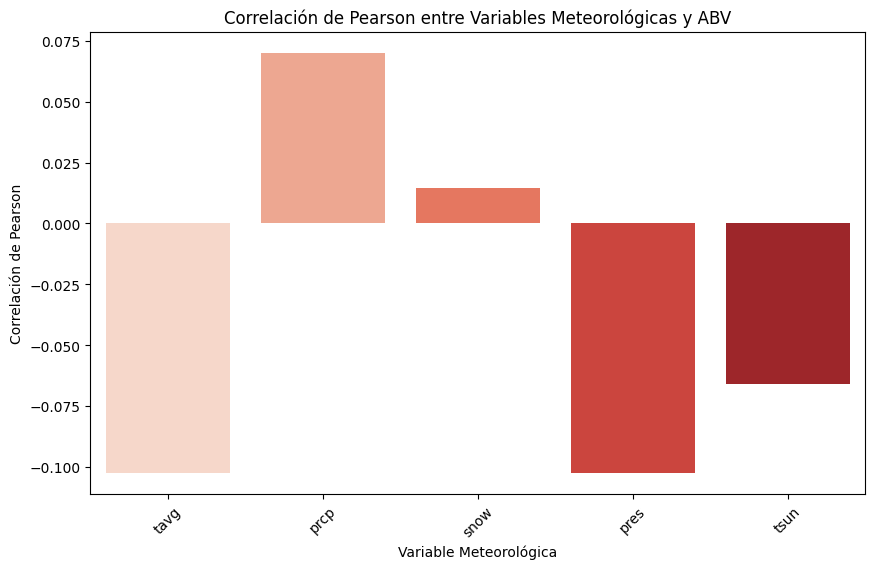

In [26]:
granate_palette = sns.color_palette("Reds", n_colors=len(correlations_df))

# Correlación para ABV
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_df.index, y='Pearson Correlation with ABV', data=correlations_df, palette=granate_palette)
plt.title('Correlación de Pearson entre Variables Meteorológicas y ABV')
plt.xlabel('Variable Meteorológica')
plt.ylabel('Correlación de Pearson')
plt.xticks(rotation=45)
plt.show()

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/714665653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anova_acidity_df.index, y='F-value for Acidity', data=anova_acidity_df, palette=granate_palette)


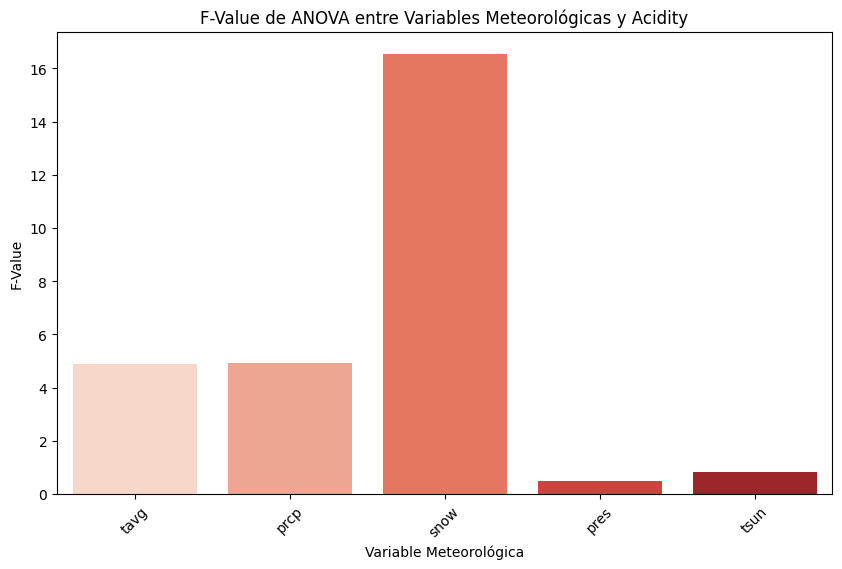

In [27]:
# ANOVA para Acidity
granate_palette = sns.color_palette("Reds", n_colors=len(anova_acidity_df))

plt.figure(figsize=(10, 6))
sns.barplot(x=anova_acidity_df.index, y='F-value for Acidity', data=anova_acidity_df, palette=granate_palette)
plt.title('F-Value de ANOVA entre Variables Meteorológicas y Acidity')
plt.xlabel('Variable Meteorológica')
plt.ylabel('F-Value')
plt.xticks(rotation=45)
plt.show()

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/3824945174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anova_body_df.index, y='F-value for Body', data=anova_body_df, palette=granate_palette)


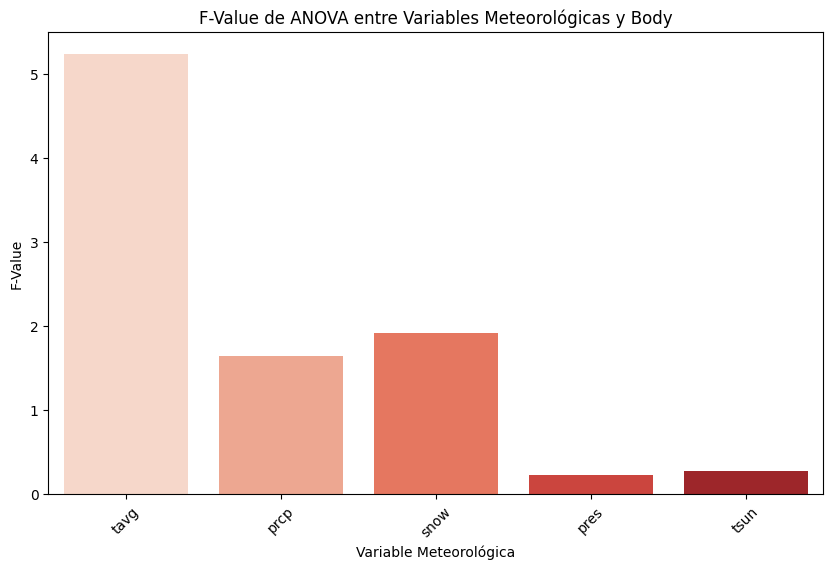

In [28]:
# ANOVA para Body
granate_palette = sns.color_palette("Reds", n_colors=len(anova_body_df))

plt.figure(figsize=(10, 6))
sns.barplot(x=anova_body_df.index, y='F-value for Body', data=anova_body_df, palette=granate_palette)
plt.title('F-Value de ANOVA entre Variables Meteorológicas y Body')
plt.xlabel('Variable Meteorológica')
plt.ylabel('F-Value')
plt.xticks(rotation=45)
plt.show()

In [35]:
model_df

,ABV,Country,RegionName,time,tavg,prcp,snow,pres,tsun,Latitude,...,Type_Red,Type_Rosé,Type_Sparkling,Type_White,Body_Light-bodied,Body_Medium-bodied,Body_Very full-bodied,Body_Very light-bodied,Acidity_Low,Acidity_Medium
0,13.5,Portugal,Ribatejo,2023,8.353933,3.147191,5.168539,1008.532584,109.505618,53.549962,...,True,False,False,False,False,False,False,False,False,False
1,13.5,Portugal,Ribatejo,2023,12.283696,0.857609,0.000000,1017.477174,468.326087,53.549962,...,True,False,False,False,False,False,False,False,False,False
2,13.5,Portugal,Ribatejo,2023,18.288298,2.175532,0.000000,1012.719149,417.638298,53.549962,...,True,False,False,False,False,False,False,False,False,False
3,13.5,Portugal,Ribatejo,2023,4.952222,2.521111,0.777778,1013.502222,119.800000,53.549962,...,True,False,False,False,False,False,False,False,False,False
4,13.5,Portugal,Ribatejo,2023,8.353933,3.147191,5.168539,1008.532584,109.505618,53.549962,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15197,13.5,Austria,Kamptal,2023,5.655556,3.480000,0.333333,1017.473333,123.677778,51.452001,...,False,False,False,True,False,True,False,False,False,False
15198,12.5,Switzerland,Thurgau,2023,8.003371,3.357303,5.617978,1015.514607,187.146067,47.585965,...,True,False,False,False,False,True,False,False,False,False
15199,12.5,Switzerland,Thurgau,2023,12.527174,2.159783,0.000000,1016.267391,428.282609,47.585965,...,True,False,False,False,False,True,False,False,False,False
15200,12.5,Switzerland,Thurgau,2023,19.409574,3.009574,0.000000,1015.895745,491.744681,47.585965,...,True,False,False,False,False,True,False,False,False,False


### Modelos

### ABV

Train MSE: 1.0908179380325433
Test MSE: 1.1534450004905386
Train R²: 0.5743761703303626
Test R²: 0.5694377062712663


/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/706234772.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


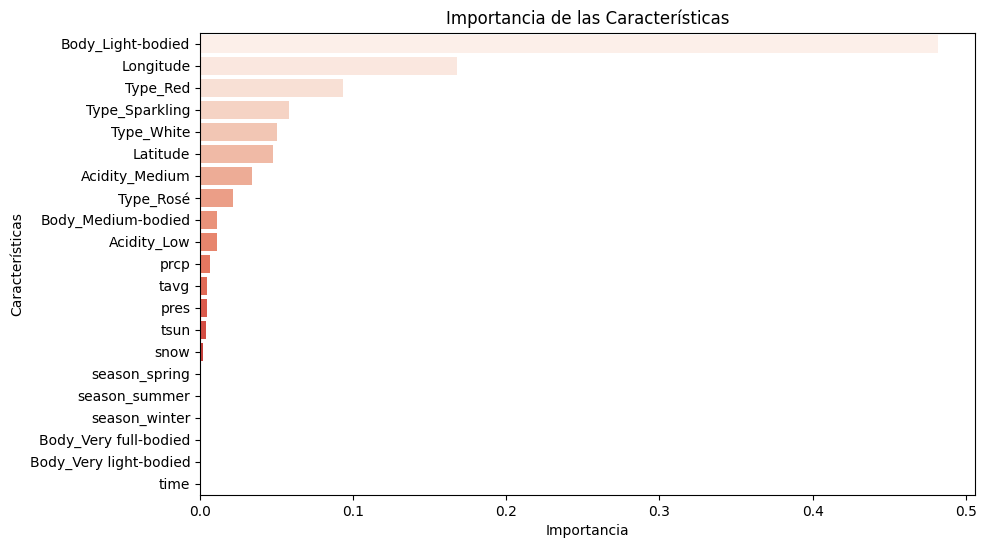

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Asegúrate de que model_df contiene las columnas correctas
model_df_filtered = model_df[['ABV',  'time', 'tavg', 'prcp', 'snow', 'pres',
                     'tsun', 'Latitude', 'Longitude', 'season_spring', 'season_summer',
                     'season_winter', 'Type_Red', 'Type_Rosé', 'Type_Sparkling',
                     'Type_White', 'Body_Light-bodied', 'Body_Medium-bodied',
                     'Body_Very full-bodied', 'Body_Very light-bodied', 'Acidity_Low',
                     'Acidity_Medium']]



# Separar las características (X) y las etiquetas (y)
X = model_df_filtered .drop(columns=['ABV'])
y = model_df_filtered ['ABV']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento y transformación
numeric_features = ['time', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ], remainder='passthrough')

# Crear pipeline para el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluar el modelo
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

# Opcional: Mostrar las características más importantes
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

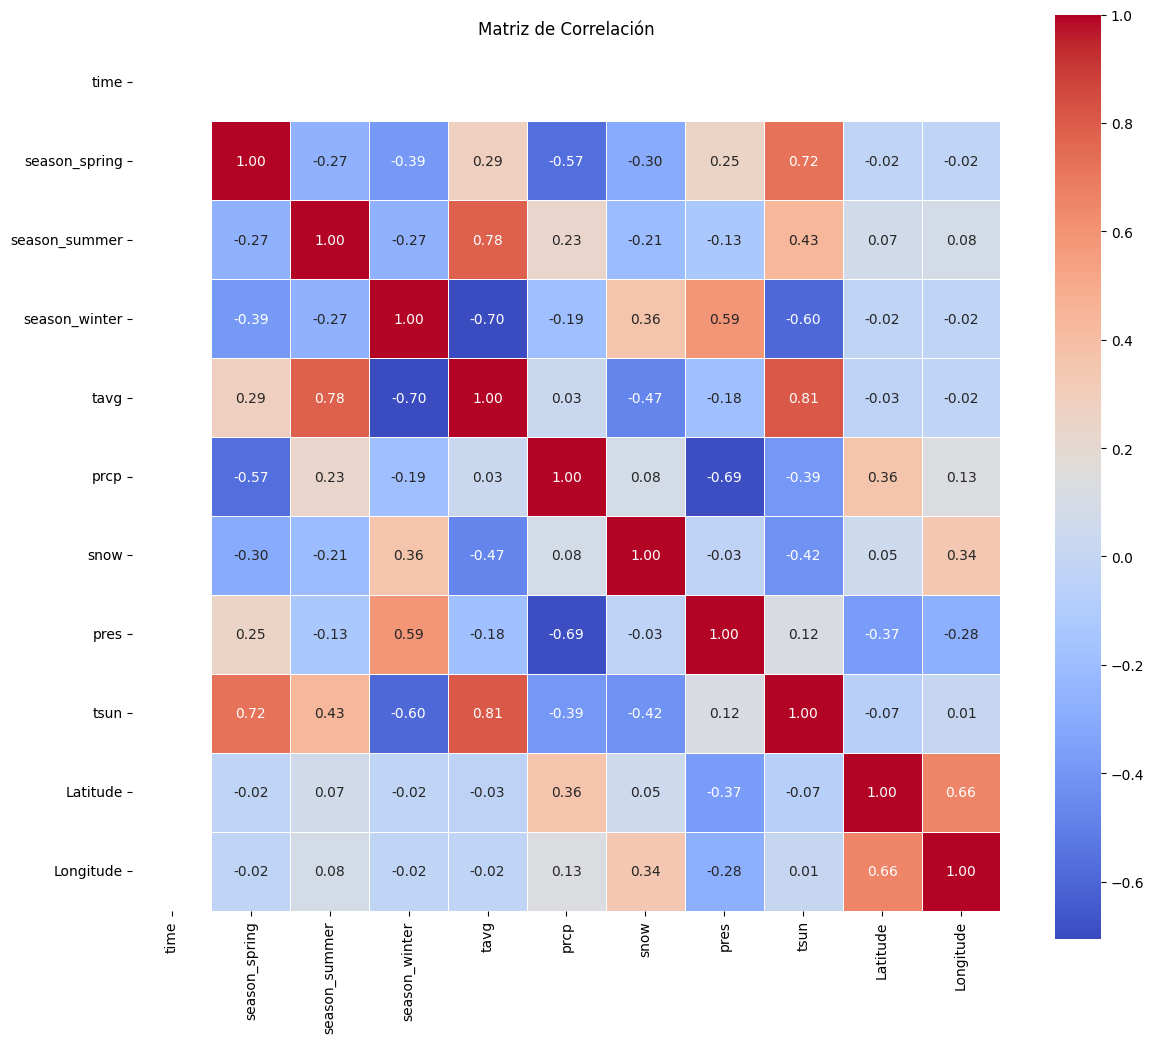

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que model_df es tu DataFrame original y ya tiene las columnas de 'season' convertidas en dummies
model_df = model_df[['time', 'season_spring', 'season_summer', 'season_winter', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']]

correlation_matrix = model_df.corr()

# Configurar la visualización de la matriz de correlación
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True, linewidths=0.5)

plt.title('Matriz de Correlación')
plt.show()

In [41]:
model_df_filtered

,ABV,time,tavg,prcp,snow,pres,tsun,Latitude,Longitude,season_spring,...,Type_Red,Type_Rosé,Type_Sparkling,Type_White,Body_Light-bodied,Body_Medium-bodied,Body_Very full-bodied,Body_Very light-bodied,Acidity_Low,Acidity_Medium
0,13.5,2023,8.353933,3.147191,5.168539,1008.532584,109.505618,53.549962,9.930416,False,...,True,False,False,False,False,False,False,False,False,False
1,13.5,2023,12.283696,0.857609,0.000000,1017.477174,468.326087,53.549962,9.930416,True,...,True,False,False,False,False,False,False,False,False,False
2,13.5,2023,18.288298,2.175532,0.000000,1012.719149,417.638298,53.549962,9.930416,False,...,True,False,False,False,False,False,False,False,False,False
3,13.5,2023,4.952222,2.521111,0.777778,1013.502222,119.800000,53.549962,9.930416,False,...,True,False,False,False,False,False,False,False,False,False
4,13.5,2023,8.353933,3.147191,5.168539,1008.532584,109.505618,53.549962,9.930416,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15197,13.5,2023,5.655556,3.480000,0.333333,1017.473333,123.677778,51.452001,6.946273,False,...,False,False,False,True,False,True,False,False,False,False
15198,12.5,2023,8.003371,3.357303,5.617978,1015.514607,187.146067,47.585965,9.142877,False,...,True,False,False,False,False,True,False,False,False,False
15199,12.5,2023,12.527174,2.159783,0.000000,1016.267391,428.282609,47.585965,9.142877,True,...,True,False,False,False,False,True,False,False,False,False
15200,12.5,2023,19.409574,3.009574,0.000000,1015.895745,491.744681,47.585965,9.142877,False,...,True,False,False,False,False,True,False,False,False,False


/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/3399823714.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_filtered['Body'] = model_df_filtered[body_columns].idxmax(axis=1)


Train Accuracy: 0.8685141024586794
Test Accuracy: 0.8678066425517922
Classification Report for Test Data:
                        precision    recall  f1-score   support

     Body_Light-bodied       0.86      0.96      0.91      2135
    Body_Medium-bodied       0.88      0.64      0.74       900
 Body_Very full-bodied       0.00      0.00      0.00         4
Body_Very light-bodied       0.00      0.00      0.00         2

              accuracy                           0.87      3041
             macro avg       0.44      0.40      0.41      3041
          weighted avg       0.87      0.87      0.86      3041



/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/haddock_ana/anaconda3/envs/Ironhack/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

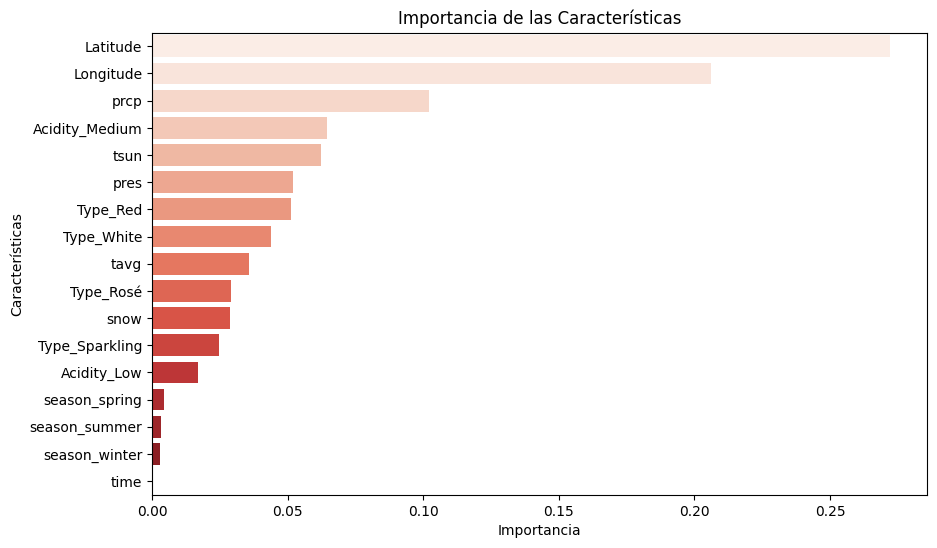

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Asegúrate de que model_df contiene las columnas correctas
model_df_filtered = model_df[['Body_Light-bodied', 'Body_Medium-bodied', 'Body_Very full-bodied', 'Body_Very light-bodied',
                              'time', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude',
                              'season_spring', 'season_summer', 'season_winter', 
                              'Type_Red', 'Type_Rosé', 'Type_Sparkling', 'Type_White', 
                              'Acidity_Low', 'Acidity_Medium']]

# Crear una nueva columna 'Body' que contenga las etiquetas de clase
body_columns = ['Body_Light-bodied', 'Body_Medium-bodied', 'Body_Very full-bodied', 'Body_Very light-bodied']
model_df_filtered['Body'] = model_df_filtered[body_columns].idxmax(axis=1)

# Separar las características (X) y las etiquetas (y)
X = model_df_filtered.drop(columns=body_columns + ['Body'])
y = model_df_filtered['Body']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento y transformación
numeric_features = ['time', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ], remainder='passthrough')

# Crear pipeline para el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

# Opcional: Mostrar las características más importantes
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

### Acidity

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/246702707.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_filtered['Acidity'] = model_df_filtered[acidity_columns].idxmax(axis=1)


Train Accuracy: 0.9398075816133542
Test Accuracy: 0.9296284117066754
Classification Report for Test Data:
                precision    recall  f1-score   support

   Acidity_Low       0.94      0.98      0.96      2718
Acidity_Medium       0.78      0.47      0.59       323

      accuracy                           0.93      3041
     macro avg       0.86      0.73      0.77      3041
  weighted avg       0.92      0.93      0.92      3041



/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/246702707.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


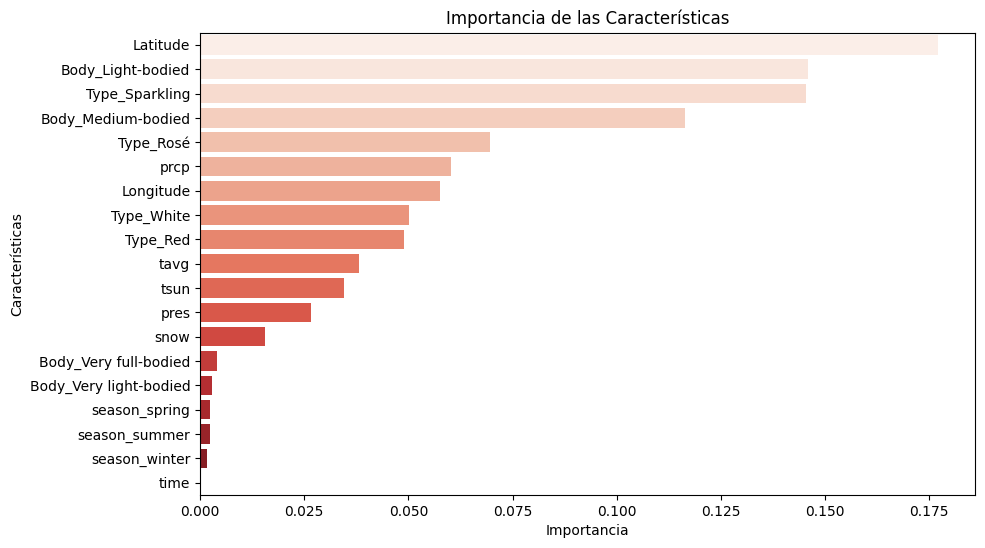

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Asegúrate de que model_df contiene las columnas correctas
model_df_filtered = model_df[['Acidity_Low', 'Acidity_Medium', 
                              'time', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude',
                              'season_spring', 'season_summer', 'season_winter', 
                              'Type_Red', 'Type_Rosé', 'Type_Sparkling', 'Type_White', 
                              'Body_Light-bodied', 'Body_Medium-bodied', 'Body_Very full-bodied', 'Body_Very light-bodied']]

# Crear una nueva columna 'Acidity' que contenga las etiquetas de clase
acidity_columns = ['Acidity_Low', 'Acidity_Medium']
model_df_filtered['Acidity'] = model_df_filtered[acidity_columns].idxmax(axis=1)

# Separar las características (X) y las etiquetas (y)
X = model_df_filtered.drop(columns=acidity_columns + ['Acidity'])
y = model_df_filtered['Acidity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento y transformación
numeric_features = ['time', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ], remainder='passthrough')

# Crear pipeline para el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print("Classification Report for Test Data:")
print(classification_report(y_test, y_test_pred))

# Opcional: Mostrar las características más importantes
importances = pipeline.named_steps['classifier'].feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

### Guardar modelos

### Primera versión

In [47]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score

# Preparar los datos (asegúrate de que model_df contiene las columnas correctas)
model_df_filtered = model_df[['ABV', 'Body_Light-bodied', 'Body_Medium-bodied', 'Body_Very full-bodied',
                              'Acidity_Low', 'Acidity_Medium',  'time', 'tavg', 'prcp', 'snow', 'pres',
                              'tsun', 'Latitude', 'Longitude', 'season_spring', 'season_summer', 'season_winter',
                              'Type_Red', 'Type_Rosé', 'Type_Sparkling', 'Type_White']]

# Crear una nueva columna 'Acidity' que contenga las etiquetas de clase
acidity_columns = ['Acidity_Low', 'Acidity_Medium']
model_df_filtered['Acidity'] = model_df_filtered[acidity_columns].idxmax(axis=1)

# Separar las características (X) y las etiquetas (y)
X = model_df_filtered.drop(columns=['ABV', 'Acidity'] + acidity_columns)
y_abv = model_df_filtered['ABV']
y_body = model_df_filtered[['Body_Light-bodied', 'Body_Medium-bodied', 'Body_Very full-bodied']].idxmax(axis=1)
y_acidity = model_df_filtered['Acidity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_abv, y_test_abv = train_test_split(X, y_abv, test_size=0.2, random_state=42)
_, _, y_train_body, y_test_body = train_test_split(X, y_body, test_size=0.2, random_state=42)
_, _, y_train_acidity, y_test_acidity = train_test_split(X, y_acidity, test_size=0.2, random_state=42)

# Preprocesamiento y transformación
numeric_features = ['time', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ], remainder='passthrough')

# Crear pipelines para los modelos
abv_regressor_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

body_classifier_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

acidity_classifier_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar los modelos
abv_regressor_pipeline.fit(X_train, y_train_abv)
body_classifier_pipeline.fit(X_train, y_train_body)
acidity_classifier_pipeline.fit(X_train, y_train_acidity)

# Hacer predicciones y evaluar los modelos
y_test_abv_pred = abv_regressor_pipeline.predict(X_test)
y_test_body_pred = body_classifier_pipeline.predict(X_test)
y_test_acidity_pred = acidity_classifier_pipeline.predict(X_test)

print(f"ABV Model Test MSE: {mean_squared_error(y_test_abv, y_test_abv_pred)}")
print(f"ABV Model Test R²: {r2_score(y_test_abv, y_test_abv_pred)}")
print("\nBody Model Classification Report:")
print(classification_report(y_test_body, y_test_body_pred))
print("\nAcidity Model Classification Report:")
print(classification_report(y_test_acidity, y_test_acidity_pred))

# Guardar los modelos
joblib.dump(abv_regressor_pipeline, 'model_abv.joblib')
joblib.dump(body_classifier_pipeline, 'model_body.joblib')
joblib.dump(acidity_classifier_pipeline, 'model_acidity.joblib')

print("Models saved successfully.")

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/1382715452.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_filtered['Acidity'] = model_df_filtered[acidity_columns].idxmax(axis=1)


ABV Model Test MSE: 1.1685987435353227
ABV Model Test R²: 0.5637810599975702

Body Model Classification Report:
                       precision    recall  f1-score   support

    Body_Light-bodied       1.00      1.00      1.00      2137
   Body_Medium-bodied       1.00      1.00      1.00       900
Body_Very full-bodied       1.00      1.00      1.00         4

             accuracy                           1.00      3041
            macro avg       1.00      1.00      1.00      3041
         weighted avg       1.00      1.00      1.00      3041


Acidity Model Classification Report:
                precision    recall  f1-score   support

   Acidity_Low       0.94      0.98      0.96      2718
Acidity_Medium       0.77      0.47      0.58       323

      accuracy                           0.93      3041
     macro avg       0.85      0.73      0.77      3041
  weighted avg       0.92      0.93      0.92      3041

Models saved successfully.


### Segunda versión

#### ABV

Train MSE: 1.2027576069830177
Test MSE: 1.2326941096091169
Train R²: 0.5306986794040711
Test R²: 0.5398553003624085


/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/1734115444.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')


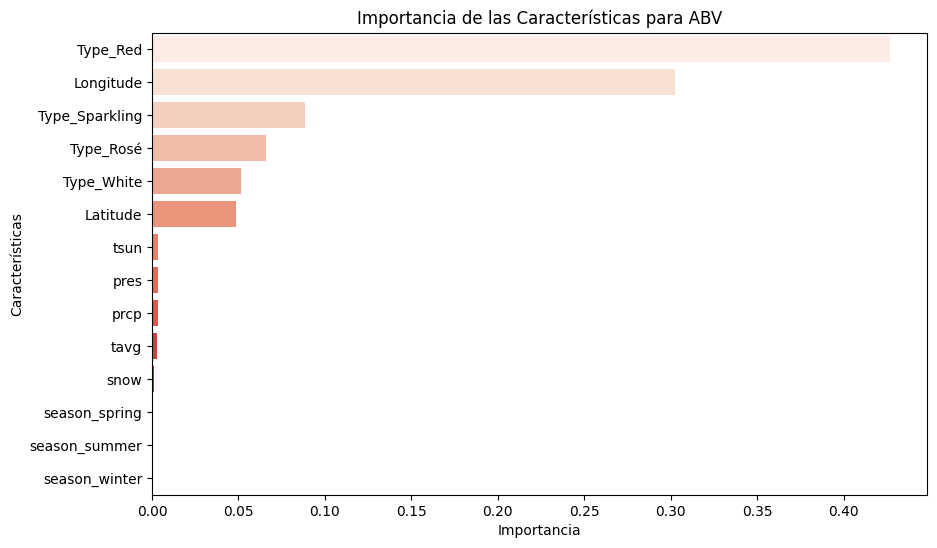

In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrado de las variables necesarias
model_df_filtered = model_df[['ABV', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude', 'Type', 'season']]

# Separar las características (X) y las etiquetas (y)
X = model_df_filtered.drop(columns=['ABV'])
y = model_df_filtered['ABV']

# Convertir la columna 'season' a variables dummy
X = pd.get_dummies(X, columns=['season'], drop_first=True)
X = pd.get_dummies(X, columns=['Type'], drop_first=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento y transformación
numeric_features = ['tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']
categorical_features = [col for col in X.columns if col.startswith('season_') or col.startswith('Type_')]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Crear pipeline para el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluar el modelo
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print(f'Train R²: {train_r2}')
print(f'Test R²: {test_r2}')

# Guardar el modelo
joblib.dump(pipeline, 'model_abv_filtered_with_type_and_season.joblib')

# Opcional: Mostrar las características más importantes
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = numeric_features + categorical_features

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='Reds')
plt.title('Importancia de las Características para ABV')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

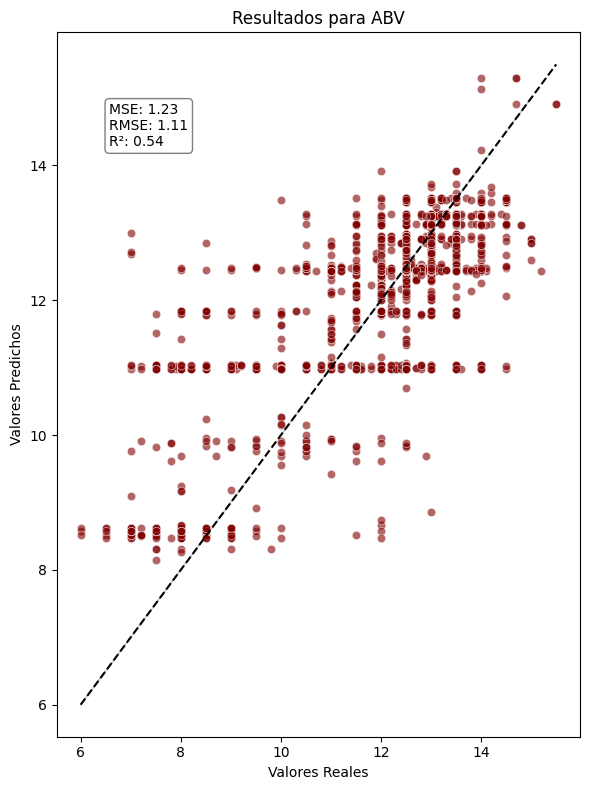

In [98]:
results_abv = {
    'ABV': {
        'y_test': y_test,
        'y_pred': y_test_pred,
        'MSE': test_mse,
        'RMSE': np.sqrt(test_mse),
        'R²': test_r2
    }
}

# Definir la paleta de colores granate
granate_palette = sns.color_palette("Reds", 10)

# Crear una función para graficar resultados
def plot_model_performance(results):
    variables = list(results.keys())
    fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(6, 8))  # Tamaño ajustado
    
    # Convertir axes en lista si solo hay un subplot
    if len(variables) == 1:
        axes = [axes]
    
    for ax, var in zip(axes, variables):
        result = results[var]
        y_test = result['y_test']
        y_pred = result['y_pred']
        
        sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='maroon', alpha=0.6)
        sns.lineplot(x=y_test, y=y_test, ax=ax, color='black', linestyle='--')
        
        ax.set_title(f'Resultados para {var}')
        ax.set_xlabel('Valores Reales')
        ax.set_ylabel('Valores Predichos')
        
        mse = result['MSE']
        rmse = result['RMSE']
        r2 = result['R²']
        
        ax.text(0.1, 0.9, f'MSE: {mse:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}',
                transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
    
    plt.tight_layout()
    plt.show()

# Graficar resultados para ABV
plot_model_performance(results_abv)

#### Body

In [107]:
model_df['Body'] = model_df['Body'].replace({'Very light-bodied': 'Light-bodied', 'Very full-bodied': 'Full-bodied'})

In [108]:
model_df.Body.value_counts()

Body
Light-bodied     6049
Medium-bodied    4626
Full-bodied      4527
Name: count, dtype: int64

/var/folders/2v/nsbsx6y90_9_6kks00t6shb80000gn/T/ipykernel_99034/1677387824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df_filtered['Body'] = model_df_filtered['Body'].replace({'Very light-bodied': 'Light-bodied', 'Very full-bodied': 'Full-bodied'})


['Full-bodied' 'Medium-bodied' 'Light-bodied']
Train Accuracy: 0.7925335087575035
Test Accuracy: 0.7908582703058205
               precision    recall  f1-score   support

  Full-bodied       0.81      0.83      0.82       878
 Light-bodied       0.75      0.92      0.82      1263
Medium-bodied       0.88      0.58      0.70       900

     accuracy                           0.79      3041
    macro avg       0.81      0.77      0.78      3041
 weighted avg       0.80      0.79      0.78      3041



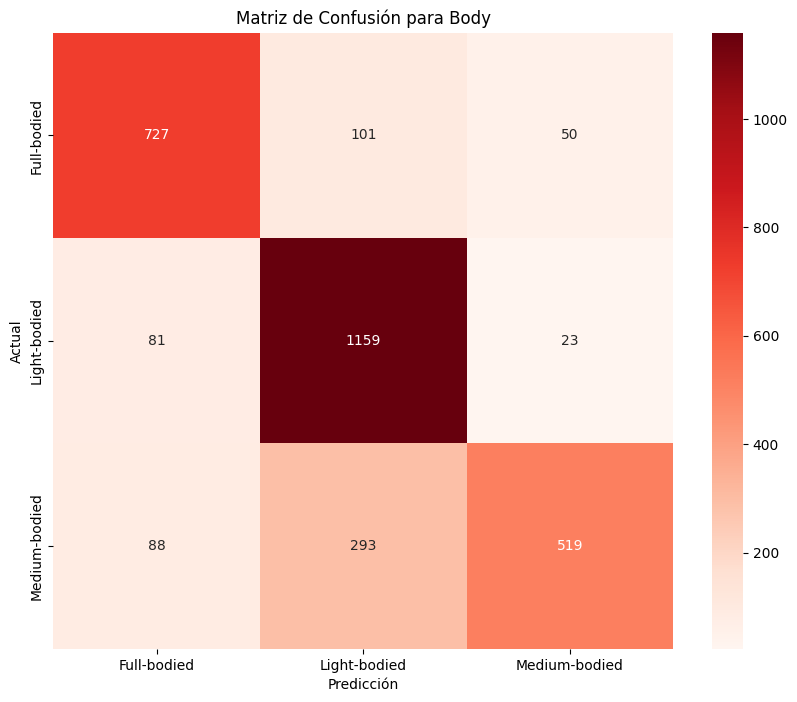

Modelo guardado como 'body_model.joblib'


In [111]:

model_df_filtered = model_df[['Body', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude', 'Type', 'season']]

# Realizar el reemplazo de las categorías en la columna 'Body'
model_df_filtered['Body'] = model_df_filtered['Body'].replace({'Very light-bodied': 'Light-bodied', 'Very full-bodied': 'Full-bodied'})

# Verificar las categorías restantes
print(model_df_filtered['Body'].unique())

# Separar las características (X) y las etiquetas (y)
X = model_df_filtered.drop(columns=['Body'])
y = model_df_filtered['Body']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento y transformación
numeric_features = ['tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']
categorical_features = ['Type', 'season']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Crear pipeline para el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, y_test_pred))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=pipeline.named_steps['classifier'].classes_)

# Crear un DataFrame para la matriz de confusión para facilitar la visualización
conf_matrix_df = pd.DataFrame(conf_matrix, index=pipeline.named_steps['classifier'].classes_, columns=pipeline.named_steps['classifier'].classes_)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión para Body')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

# Guardar el modelo
joblib.dump(pipeline, 'body_model.joblib')
print("Modelo guardado como 'body_model.joblib'")

### Acidity

['High' 'Medium' 'Low']
Train Accuracy: 0.8922785955102377
Test Accuracy: 0.8898388687931601
              precision    recall  f1-score   support

        High       0.93      0.96      0.94      2660
         Low       0.57      0.07      0.12        58
      Medium       0.55      0.48      0.51       323

    accuracy                           0.89      3041
   macro avg       0.68      0.50      0.53      3041
weighted avg       0.88      0.89      0.88      3041



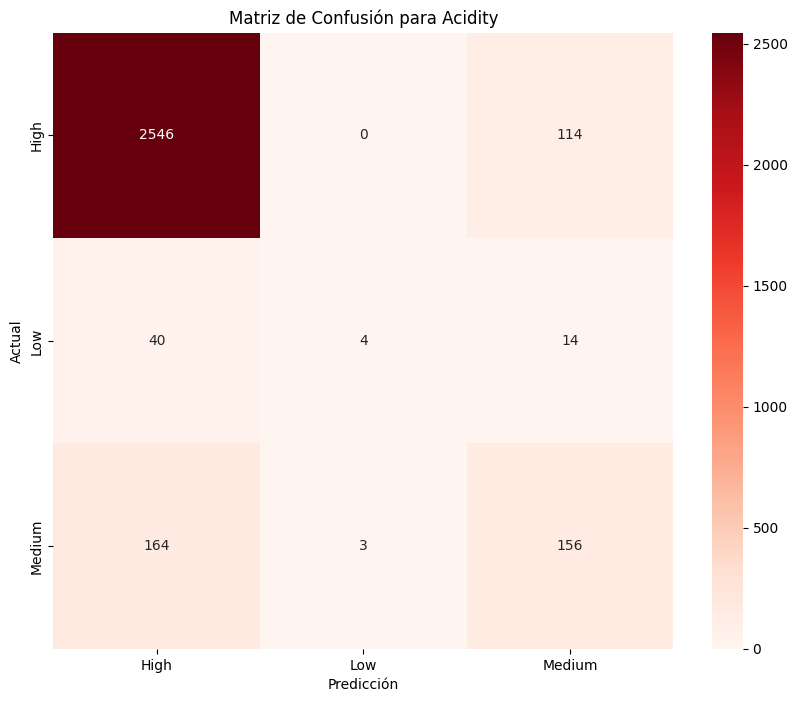

Modelo guardado como 'acidity_model.joblib'


In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Ajustar el DataFrame filtrado
model_df_filtered = model_df[['Acidity', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude', 'Type', 'season']]

# Verificar las categorías en la columna 'Acidity'
print(model_df_filtered['Acidity'].unique())

# Separar las características (X) y las etiquetas (y)
X = model_df_filtered.drop(columns=['Acidity'])
y = model_df_filtered['Acidity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento y transformación
numeric_features = ['tavg', 'prcp', 'snow', 'pres', 'tsun', 'Latitude', 'Longitude']
categorical_features = ['Type', 'season']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Crear pipeline para el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Evaluar el modelo
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(classification_report(y_test, y_test_pred))

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred, labels=pipeline.named_steps['classifier'].classes_)

# Crear un DataFrame para la matriz de confusión para facilitar la visualización
conf_matrix_df = pd.DataFrame(conf_matrix, index=pipeline.named_steps['classifier'].classes_, columns=pipeline.named_steps['classifier'].classes_)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Reds')
plt.title('Matriz de Confusión para Acidity')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

# Guardar el modelo
joblib.dump(pipeline, 'acidity_model.joblib')
print("Modelo guardado como 'acidity_model.joblib'")

### Aplicar modelos

In [113]:
abv_model = joblib.load('model_abv_filtered_with_type_and_season.joblib')
body_model = joblib.load('body_model.joblib')
acidity_model = joblib.load('acidity_model.joblib')


In [17]:
combined_df.head(1)

,WineID,WineName,Type,Elaborate,Grapes,ABV,Body,Acidity,Country,RegionName,time,season,tavg,prcp,snow,pres,tsun,Latitude,Longitude,country
0,101786,Touriga Nacional-Cabernet Sauvignon Reserva,Red,Blend,"['Touriga Nacional', 'Cabernet Sauvignon']",13.5,Full-bodied,High,Portugal,Ribatejo,2023,autumn,8.353933,3.147191,5.168539,1008.532584,109.505618,53.549962,9.930416,Portugal


In [120]:
combined_df.head(1)

,WineID,WineName,Type,Elaborate,Grapes,ABV,Body,Acidity,Country,RegionName,time,season,tavg,prcp,snow,pres,tsun,Latitude,Longitude,country
0,101786,Touriga Nacional-Cabernet Sauvignon Reserva,Red,Blend,"['Touriga Nacional', 'Cabernet Sauvignon']",13.5,Full-bodied,High,Portugal,Ribatejo,2023,autumn,8.353933,3.147191,5.168539,1008.532584,109.505618,53.549962,9.930416,Portugal


In [18]:
combined_df.to_csv('combined_tableau.csv')

In [186]:
years = range(2024, 2034)
seasons = ['spring', 'summer', 'autumn', 'winter']

future_data = []

for wine_name in combined_df['WineName'].unique():
    latitude = combined_df[combined_df['WineName'] == wine_name]['Latitude'].values[0]
    longitude = combined_df[combined_df['WineName'] == wine_name]['Longitude'].values[0]
    region_name = combined_df[combined_df['WineName'] == wine_name]['RegionName'].values[0]
    for year in years:
        for season in seasons:
            future_data.append({
                'WineName': wine_name,
                'Latitude': latitude,
                'Longitude': longitude,
                'RegionName': region_name,
                'time': year,
                'season': season
            })

future_df = pd.DataFrame(future_data)

required_columns = ['WineName', 'Latitude', 'Longitude', 'RegionName', 'time', 'season']
for col in required_columns:
    if col not in future_df.columns:
        future_df[col] = None

print(future_df.shape)

(93040, 6)


In [187]:
future_df

,WineName,Latitude,Longitude,RegionName,time,season
0,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,spring
1,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,summer
2,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,autumn
3,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,winter
4,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2025,spring
...,...,...,...,...,...,...
93035,Iselisberg Steigässli Pinot Noir,47.585965,9.142877,Thurgau,2032,winter
93036,Iselisberg Steigässli Pinot Noir,47.585965,9.142877,Thurgau,2033,spring
93037,Iselisberg Steigässli Pinot Noir,47.585965,9.142877,Thurgau,2033,summer
93038,Iselisberg Steigässli Pinot Noir,47.585965,9.142877,Thurgau,2033,autumn


In [189]:
future_df['season'] = future_df['season'].str.lower()
clima['season'] = clima['season'].str.lower()

# Añadir el Type al future_df
future_df = future_df.merge(combined_df[['WineName', 'Type', 'RegionName']], on='WineName', how='left')

# Merge future_df con clima
combined_future_df = future_df.merge(
    clima[['time', 'season', 'tavg', 'prcp', 'snow', 'pres', 'tsun', 'RegionName', 'country']],
    on=['RegionName', 'time', 'season'],
    how='left'
)

In [190]:
combined_future_df.head()

,WineName,Latitude,Longitude,RegionName_x,time,season,Type_x,RegionName_y,Type_y,RegionName,tavg,prcp,snow,pres,tsun,country
0,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,spring,Red,Ribatejo,Red,Ribatejo,11.929891,4.013258,67.871925,1005.123614,419.190417,Portugal
1,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,spring,Red,Ribatejo,Red,Ribatejo,11.929891,4.013258,67.871925,1005.123614,419.190417,Portugal
2,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,spring,Red,Ribatejo,Red,Ribatejo,11.929891,4.013258,67.871925,1005.123614,419.190417,Portugal
3,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,spring,Red,Ribatejo,Red,Ribatejo,11.929891,4.013258,67.871925,1005.123614,419.190417,Portugal
4,Touriga Nacional-Cabernet Sauvignon Reserva,53.549962,9.930416,Ribatejo,2024,spring,Red,Ribatejo,Red,Ribatejo,11.929891,4.013258,67.871925,1005.123614,419.190417,Portugal


In [194]:
combined_future_df = combined_future_df.drop(columns=['RegionName_x', 'Type_x', 'RegionName_y'])

# Renombrar columnas adecuadamente
combined_future_df = combined_future_df.rename(columns={
    'RegionName': 'RegionName',
    'Type_y': 'Type'
})

In [192]:
combined_future_df.to_csv('combined_future_df_.csv')

### Feauture importance por tipo de vino

In [20]:
regions_future_data =pd.read_csv('combined_future_df_.csv')

KeyboardInterrupt: 